# Scientific Study: Ridge, Lasso, and ElasticNet Regression for Climate and Environmental Research

## Dataset Description

This dataset contains observations from the **Algerian Forest Fires Dataset**, which records various meteorological and environmental features that may influence the occurrence of forest fires. The data spans multiple months and includes key weather parameters and fire risk indices. The dataset can serve as a valuable tool for scientific studies focused on understanding the relationship between climate conditions and forest fire risk.

### Key Features:

- **Date Information**: Columns like `day`, `month`, and `year` represent the specific day for each data entry.
- **Weather Data**:
  - **Temperature**: Average daily temperature, likely in degrees Celsius.
  - **Relative Humidity (RH)**: The percentage of moisture in the air.
  - **Wind Speed (Ws)**: Wind speed, likely measured in kilometers per hour (km/h).
  - **Rain**: Amount of rainfall recorded, which could affect fire risk.
  
- **Fire Weather Index (FWI) Related Features**:
  - **FFMC (Fine Fuel Moisture Code)**: An index representing moisture content in surface litter.
  - **DMC (Duff Moisture Code)**: Represents moisture content in decomposing organic matter.
  - **DC (Drought Code)**: Reflects the long-term drying conditions.
  - **ISI (Initial Spread Index)**: Predicts the speed of fire spread.
  - **BUI (Buildup Index)**: Combines DMC and DC to estimate fuel availability.
  - **FWI (Fire Weather Index)**: A composite index representing overall fire danger.

- **Classes**: The target variable indicating whether a forest fire occurred or not, labeled as "fire" or "not fire."

## Research Problem

This study aims to provide insights into the correlation between environmental factors and forest fires using data from **Algerian forest regions**. The goal is to leverage this dataset to advise **scientific and climate studies**, helping to:
- **Predict fire risk** based on key weather and environmental variables.
- **Understand the impact of climate conditions** on forest ecosystems, specifically in regions prone to wildfires.
- **Assess long-term climate trends** and their contribution to increasing fire risk under varying conditions.

By investigating forest fire occurrences in Algeria, this study may offer broader insights into how **climate change and extreme weather patterns** affect wildfire activity globally.

## Application of Ridge, Lasso, and ElasticNet Regression

In this project, **Ridge**, **Lasso**, and **ElasticNet Regression** will be used to model and predict forest fire occurrences based on the dataset’s environmental and meteorological features.

### Why Ridge, Lasso, and ElasticNet?

1. **Ridge Regression**: Helps handle **multicollinearity**, as some weather-related features, such as temperature, humidity, and fire weather indices, are likely to be correlated. Ridge regression applies a penalty to the magnitude of the coefficients, improving the model's stability.
   
2. **Lasso Regression**: Performs **feature selection** by shrinking some coefficients to zero, which is critical for identifying the most significant weather and environmental factors influencing fire risk.

3. **ElasticNet Regression**: ElasticNet combines the penalties of **both Ridge and Lasso**. This is particularly useful when dealing with highly correlated predictors and when we expect that some features should be completely excluded (like Lasso) but we still want to retain some regularization strength (like Ridge). ElasticNet provides a balance between Ridge's ability to handle multicollinearity and Lasso's ability to perform feature selection, making it a more flexible approach.

### Expected Outcomes:
- **Fire Risk Prediction**: By analyzing historical fire occurrences and environmental factors, the study aims to develop a predictive model that can forecast fire risk based on weather and climate conditions.
- **Identification of Key Drivers**: Lasso and ElasticNet regression will enable the identification of the most critical weather and climate variables influencing forest fire risk, while Ridge regression will provide a more stable model.
- **Climate and Environmental Insights**: The findings could provide valuable insights for **climate change research**, helping to better understand how increasing temperatures, changing rainfall patterns, and other factors contribute to fire risks in various ecosystems.

## Broader Impact

The results of this study have the potential to inform not just fire prevention efforts but also broader **environmental management policies**. By understanding how climate factors contribute to fire occurrences, we can gain insights into how **climate change** might exacerbate forest fire risks globally. This data-driven approach could also assist in formulating **adaptive strategies** for forest management and conservation in the face of changing environmental conditions.

# Exploratory Data Analysis (EDA)

## 1. Dataset Overview
We start by examining the structure of the dataset:
- Checking the number of rows and columns.
- Verifying the data types of each feature.
- Identifying any missing or inconsistent data.
- Reviewing the first few records to understand the dataset better.
- Initially visualizing the data

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Load the dataset and merge disparate data
df = pd.read_csv('../data/Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [7]:
df.shape

(246, 14)

In [8]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [9]:
df.info

<bound method DataFrame.info of     day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fir

In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Data Cleaning

In [11]:
# Find missing or null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is currently divided based on region, to recitfy this, a new column will be created based on region.

In [12]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [14]:
df[["Region"]] = df[["Region"]].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [18]:
# Drop null values
df = df.dropna().reset_index(drop=True)

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [20]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [21]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [22]:
# Remove unnecessary row
df = df.drop(122).reset_index(drop=True)

In [23]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [24]:
# Eliminate whitespace from the columns
df.columns = df.columns.str.strip()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [26]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


### Change the required columns to integer data types

In [27]:
df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


### Change other columns to float datatype

In [29]:
objects = [features for features in df.columns if df[features].dtypes == 'O']

In [30]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


### Explore summary statistics on the cleaned dataset

In [32]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


### Save the cleaned dataset

In [33]:
df.to_csv('./data/Algerian_forest_fires_dataset_cleaned.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'data'

### Begin next phase of Exploratory Data Analysis

In [30]:
# Trim unnecessary columns
df_copy = df.drop(['day', 'month', 'year'], axis=1)

In [31]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
# Encode categories in classes
df_copy['Classes'] = np.where(df_copy['Classes'].astype(str).str.contains('not fire', na=False), 0, 1)

In [33]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [34]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [35]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

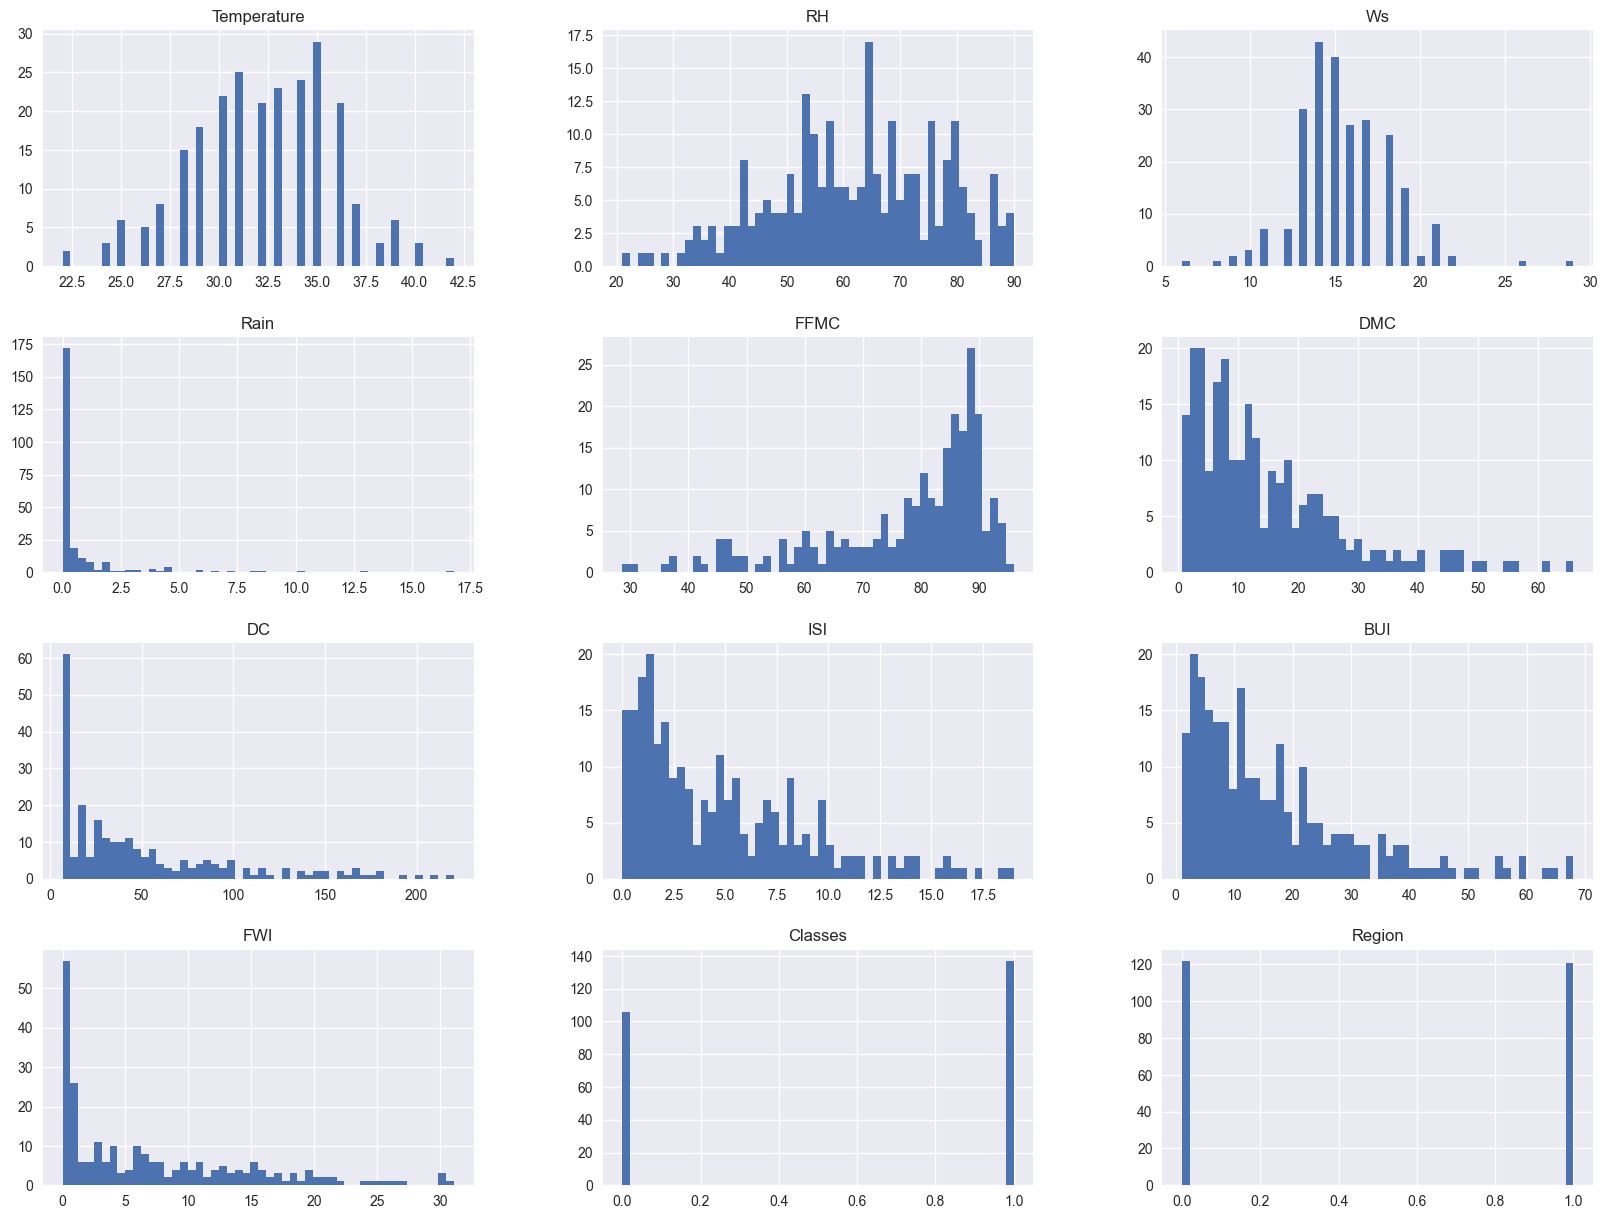

In [36]:
# Density plot for all features
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Percentage of Fires vs Non-Fire Events')

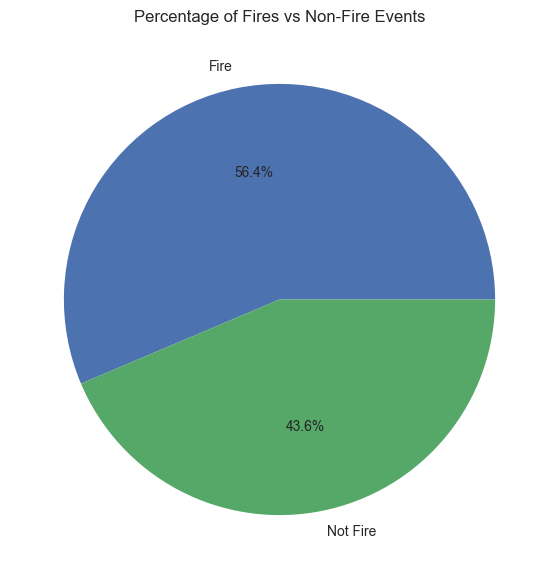

In [37]:
# Pie chart visualization
percentage = df_copy['Classes'].value_counts(normalize=True)*100
classlabels = ['Fire', 'Not Fire']
plt.figure(figsize=(12, 7))
plt.pie(percentage, labels=classlabels, autopct='%1.1f%%')
plt.title("Percentage of Fires vs Non-Fire Events")

### Exploring Correlation

In [38]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [1]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: ylabel='FWI'>

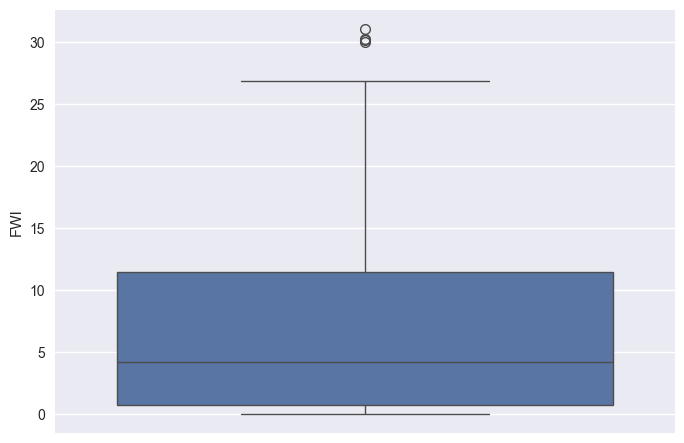

In [40]:
# Box plots to explore outliers
sns.boxplot(df['FWI'])

### Fire analysis by month

In [41]:
df['Classes'] = np.where(df['Classes'].astype(str).str.contains('not fire'), 'not fire', 'fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Region')

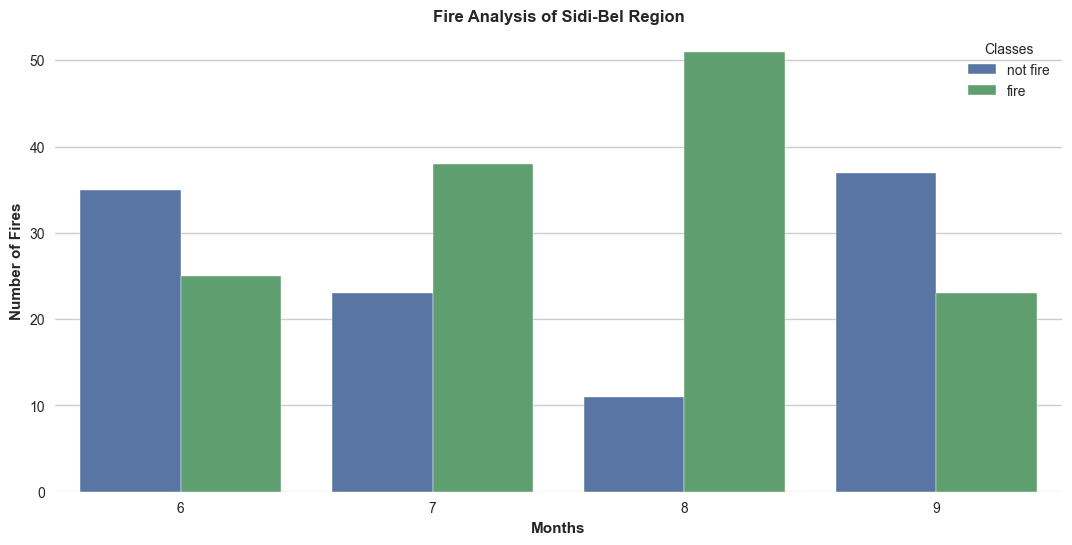

In [45]:
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title('Fire Analysis of Sidi-Bel Abbes Region', weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

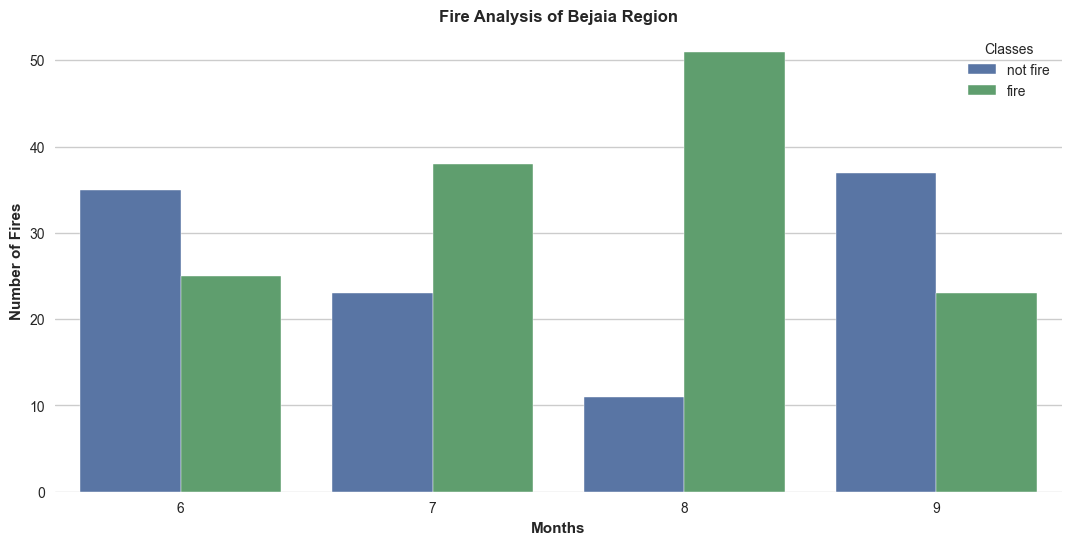

In [46]:
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title('Fire Analysis of Bejaia Region', weight='bold')

## Conclusion
According to the data, July and August are the peak months for forest fires in both the Bejaia and Sidi-Bel Abbes regions, with August showing the highest frequency of fires overall. This suggests that August is the most vulnerable period for fire outbreaks in both regions. The Sidi-Bel Abbes region also shows a significant number of fires extending into September, indicating a longer high-risk period in this area. The analysis revealed strong correlations between fire occurrence and weather conditions, particularly as captured by fire weather indices like FFMC, ISI, and FWI. These insights emphasize the importance of heightened fire prevention efforts during the summer months, especially in August, when the risk is highest. They also highlight the need for region-specific strategies, given the differences in fire patterns between Bejaia and Sidi-Bel Abbes.